In [16]:
from tensorflow import keras
from tensorflow.keras import layers
import splitfolders
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np
from modelfunc import save_model

In [ ]:
np.random.seed(123)

In [ ]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

In [ ]:
tf.get_logger().setLevel('ERROR')

#### Image Parameters

In [2]:
batch_size = 32
img_height = 256
img_width = 256
img_channels = 3

#### Data

In [3]:
train_split_test_dir='../0. Project Data/Reshaped zero-padded and split data'
train_ds = image_dataset_from_directory(
    train_split_test_dir + '/train',
    image_size=(img_width, img_height),
    batch_size=batch_size)
val_ds = image_dataset_from_directory(
    train_split_test_dir + '/val',
    image_size=(img_width, img_height),
    batch_size=batch_size)
test_ds = image_dataset_from_directory(
    train_split_test_dir + '/test',
    image_size=(img_width, img_height),
    batch_size=batch_size)

Found 2678 files belonging to 4 classes.
Found 667 files belonging to 4 classes.
Found 843 files belonging to 4 classes.


Here we use the convolutional base from a pre-trained model trained with ImageNet dataset. We freeze the weights on the convolutional base because if we don't, the randomly initialized dense classifying layers will backpropogate and destroy all the learning from our pretrained convolutional base.

In [4]:
conv_base = keras.applications.vgg16.VGG16(
 weights='imagenet',
 include_top=False)
conv_base.trainable = False

In [5]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [6]:
# enginerring more data by applying randomized horizontal flips, zooms(+/- 20%), and rotates (+/- 10%)
data_augmentation = keras.Sequential([layers.RandomFlip('horizontal'), layers.RandomRotation(0.1), layers.RandomZoom(0.2),])

In [7]:
inputs = keras.Input(shape=(img_height, img_width, img_channels))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 256, 256, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 256, 256, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                             

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [12]:
history = model.fit(
 train_ds,
 epochs=100,
 validation_data=val_ds
)

Epoch 1/100
84/84 [==============================] - 49s 478ms/step - loss: 23.2625 - accuracy: 0.8391 - val_loss: 8.1665 - val_accuracy: 0.9250
Epoch 2/100
84/84 [==============================] - 29s 343ms/step - loss: 12.2823 - accuracy: 0.9059 - val_loss: 14.2320 - val_accuracy: 0.8861
Epoch 3/100
84/84 [==============================] - 29s 341ms/step - loss: 6.0683 - accuracy: 0.9358 - val_loss: 6.0449 - val_accuracy: 0.9235
Epoch 4/100
84/84 [==============================] - 29s 343ms/step - loss: 3.3338 - accuracy: 0.9440 - val_loss: 5.8626 - val_accuracy: 0.9205
Epoch 5/100
84/84 [==============================] - 29s 342ms/step - loss: 2.6309 - accuracy: 0.9470 - val_loss: 5.8241 - val_accuracy: 0.8981
Epoch 6/100
84/84 [==============================] - 29s 349ms/step - loss: 2.2277 - accuracy: 0.9492 - val_loss: 6.5437 - val_accuracy: 0.9115
Epoch 7/100
84/84 [==============================] - 29s 344ms/step - loss: 1.4501 - accuracy: 0.9630 - val_loss: 4.4651 - val_accura

Epoch 41/100
84/84 [==============================] - 29s 344ms/step - loss: 0.8024 - accuracy: 0.9698 - val_loss: 4.9392 - val_accuracy: 0.9400
Epoch 42/100
84/84 [==============================] - 29s 341ms/step - loss: 1.0960 - accuracy: 0.9716 - val_loss: 5.2267 - val_accuracy: 0.9250
Epoch 43/100
84/84 [==============================] - 29s 339ms/step - loss: 1.1838 - accuracy: 0.9712 - val_loss: 3.3794 - val_accuracy: 0.9415
Epoch 44/100
84/84 [==============================] - 29s 340ms/step - loss: 0.9247 - accuracy: 0.9761 - val_loss: 3.5003 - val_accuracy: 0.9430
Epoch 45/100
84/84 [==============================] - 29s 340ms/step - loss: 0.5443 - accuracy: 0.9780 - val_loss: 5.8944 - val_accuracy: 0.9220
Epoch 46/100
84/84 [==============================] - 29s 342ms/step - loss: 0.7923 - accuracy: 0.9754 - val_loss: 4.1236 - val_accuracy: 0.9355
Epoch 47/100
84/84 [==============================] - 29s 341ms/step - loss: 0.9552 - accuracy: 0.9750 - val_loss: 4.2433 - val_ac

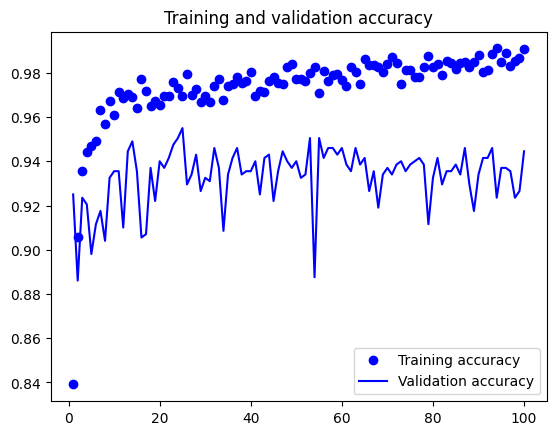

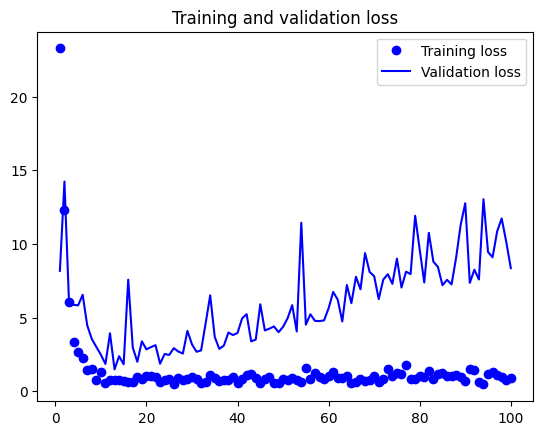

In [13]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
save_path = '../3. Model Selection/saved_models/Zero-padded Data Transfer Learning Model/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
save_model(model, save_path)